In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set()

Read data

In [30]:
tracks = pd.read_pickle("../../data/spotify_dataset_all.pkl")

In [31]:
tracks.sample(n=3)

,artists,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,time_signature,classical,country,edm,hip-hop,jazz,pop,rap,rnb,rock
4sOlbksuGHyUkSafNnho2f,[Queensrÿche],Jet City Woman - Remastered 2003,0.499,0.934,8,-3.661,0,0.0966,0.0468,0.000003,...,4,0,0,0,0,0,0,0,0,1
4kLzo3exwh18YxYqBxLsuX,[Kellie Pickler],Didn't You Know How Much I Loved You,0.525,0.795,9,-4.696,1,0.0402,0.2450,0.000000,...,4,0,1,0,0,0,0,0,0,0
3aJ29qg7NzVidyNHwjqH6R,"[Harrison Birtwistle, London Sinfonietta, Davi...",Virelai (Sus une fontayne),0.502,0.192,9,-16.138,0,0.0410,0.9300,0.186000,...,4,1,0,0,0,0,0,0,0,0


Remove unnecessary variables

In [32]:
cleaned_tracks = tracks.drop(['artists', 'name'], axis=1)
cleaned_tracks.sample(n=1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,classical,country,edm,hip-hop,jazz,pop,rap,rnb,rock
3ISiZ0GzocM9ssIwqRn1AW,0.627,0.878,10,-3.014,0,0.0409,0.00188,0.0,0.228,0.208,...,4,0,0,1,0,0,0,0,0,0


Normalise

In [33]:
GENRES = ['classical', 'country', 'edm', 'hip-hop', 'jazz', 'pop', 'rap', 'rnb', 'rock']

In [34]:
normalised_vals = cleaned_tracks.drop(GENRES, axis=1)
normalised_vals = (normalised_vals - normalised_vals.min())/(normalised_vals.max() - normalised_vals.min())
cleaned_tracks = pd.merge(normalised_vals, cleaned_tracks[GENRES], left_index=True, right_index=True)

Lookup proportions

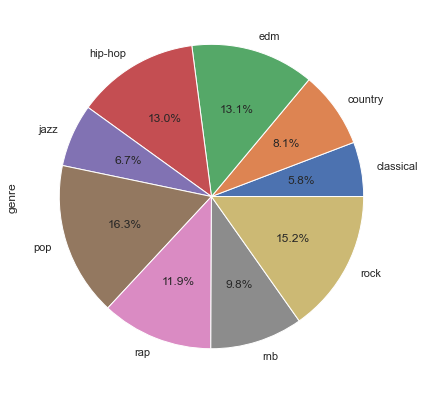

In [35]:
counts = {}

for genre in GENRES:
    count = cleaned_tracks.loc[cleaned_tracks[genre] == 1].shape[0]
    counts[genre] = count

pd.Series(counts, name='genre').plot.pie(autopct='%1.1f%%', figsize=(7,7));

In [36]:
counts

{'classical': 432,
 'country': 608,
 'edm': 980,
 'hip-hop': 969,
 'jazz': 499,
 'pop': 1220,
 'rap': 885,
 'rnb': 735,
 'rock': 1136}

Resample to get equal counts of all genres

In [37]:
resampled_df = pd.DataFrame()

for genre in GENRES:
    genre_df = cleaned_tracks.loc[cleaned_tracks[genre] == 1].sample(n=420, random_state=1)
    resampled_df = pd.concat([resampled_df, genre_df])

resampled_df.sample(n=9)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,classical,country,edm,hip-hop,jazz,pop,rap,rnb,rock
3GDpfMuo5SBJUNFD9TrMOL,0.672451,0.543684,0.181818,0.701364,1.0,0.044227,0.230921,0.001222,0.085768,0.753459,...,0.75,0,1,0,0,0,0,0,0,0
1q51MejmtLKEv8mABG8XRE,0.557484,0.687097,0.090909,0.844960,1.0,0.785487,0.297186,0.000000,0.625026,0.938625,...,0.75,0,0,0,0,0,0,0,1,0
2m6Ko3CY1qXNNja8AlugNc,0.540130,0.559730,1.000000,0.835621,1.0,0.035487,0.014555,0.000000,0.128859,0.326953,...,0.75,0,0,0,0,0,1,0,0,0
7hCZVX8ogwzgszIKtkD6Bv,0.415401,0.720193,0.090909,0.900835,0.0,0.117055,0.122487,0.000005,0.105034,0.140747,...,0.75,0,0,1,0,0,0,0,0,0
1Df1rxgMob1qQudexDEKuu,0.577007,0.506576,0.181818,0.762099,1.0,0.010328,0.413653,0.000004,0.035633,0.368563,...,0.75,0,0,0,0,0,0,0,1,0
7njVyqzN7SfrGHvOo4hXGX,0.540130,0.272902,0.454545,0.611112,1.0,0.018538,0.259034,0.068126,0.061218,0.547488,...,0.75,0,0,0,0,1,0,0,0,0
2AX5E86cn9n2dgioZEjirI,0.543384,0.383221,0.545455,0.632970,1.0,0.021186,0.143571,0.126273,0.128859,0.598460,...,0.50,0,0,0,0,0,0,0,0,1
3TZXieYvqCuR40LZJbp6Ik,0.622560,0.837531,0.363636,0.866549,1.0,0.064619,0.041061,0.739308,0.106070,0.241652,...,0.75,0,0,0,0,0,0,0,0,1
3DF7Mbt9hrFo04EZO0Syyg,0.287419,0.100405,0.727273,0.465321,1.0,0.040519,0.997992,0.959267,0.090532,0.049308,...,0.75,0,0,0,0,1,0,0,0,0


Prepare data for models

In [38]:
X = resampled_df.drop(GENRES, axis=1).to_numpy()
y = resampled_df.loc[:, GENRES].to_numpy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Models

In [40]:
from skmultilearn.adapt import MLARAM

cls = MLARAM(threshold=0.02, vigilance=0.94).fit(X_train, y_train)

preds = cls.predict(X_test)
accuracy_score(y_test, preds)

0.4947089947089947